# Plot scan

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from auxPlots import interpolateData,getContours,saveContours
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [3]:
#Load scan data
dataDF = pd.read_pickle('./ewk_Fig11.pcl')
# print(dataDF.columns.values.tolist()) #Print all columns names

In [4]:
kfactor = 1.2

### Define colors and plotting order

In [5]:
colors = sns.color_palette("Paired",10)
colorsPink = sns.color_palette("colorblind",8)
colorDict = {'HighPT' : colorsPink[4], #light pink
             'Trackless' : colors[4] }
srs = {'HighPT' : dataDF[(dataDF['SR'] == 'HighPT')], 'Trackless' : dataDF[(dataDF['SR'] == 'Trackless')]}

atlasCurve = np.genfromtxt('../ATLAS_data/HEPData-ins2628398-v1-csv/excl_ewk_obs_nominal.csv',delimiter=',',comments='#')

### Plot excluded points grouped by most excluding analysis

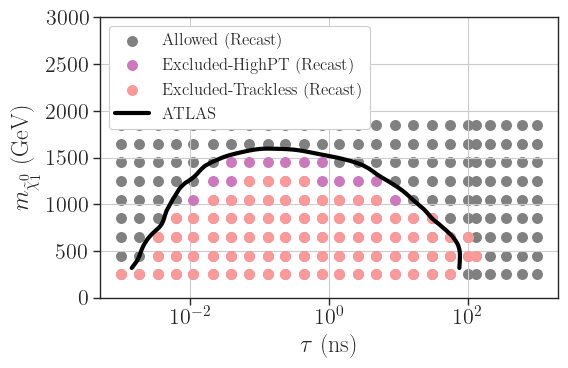

In [6]:

plt.figure(figsize=(6,4))
allowed = dataDF[dataDF['robs'] < 1.0/kfactor]
n = 0
for sr,data in srs.items():
    # if sr != 'Trackless': continue
    excluded = data[data['robs'] > 1.0/kfactor]
    allowed = data[data['robs'] < 1.0/kfactor]
    x = allowed['tau_ns']
    y = allowed['mLLP']
    if n == 0:
        plt.scatter(x,y,color='gray',s=50,label='Allowed (Recast)',zorder=-1)
        n += 1
    x = excluded['tau_ns']
    y = excluded['mLLP']
    color = colorDict[sr]
    # plt.scatter(x,y,color=color,label=sr,s=50)
    plt.scatter(x,y,color=color,label='Excluded-%s (Recast)' %sr,s=50,zorder=2)

plt.plot(atlasCurve[:,0],atlasCurve[:,1],linewidth=3,c='black',linestyle='solid',label='ATLAS')
lgd = plt.legend(loc='upper left',framealpha=1.,fontsize=12)
plt.xscale('log')
plt.xlabel(r'$\tau$ (ns)')
plt.ylabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
plt.tight_layout()
# plt.xlim(1e-3,30)
plt.ylim(0,3000)
plt.grid()
plt.tight_layout()
plt.savefig('recast_Fig11.png')
plt.show()

In [12]:
d = dataDF[(dataDF['mLLP'] == 1650) & (dataDF['tau_ns'] < 0.240) & (dataDF['tau_ns'] > 0.220)]
d.T

,128,129
Luminosity (1/fb),139.0,139.0
SR,HighPT,Trackless
$N_s$,2.293,0.08888
AccEff,NaN,NaN
Total,"(3.706, 1.0)","(3.706, 1.0)"
Jet selection,"(3.457, 0.933)","(3.683, 0.994)"
DV selection,"(2.293, 0.6188)","(0.08888, 0.02398)"
mLLP,1650.0,1650.0
mLSP,1650.0,1650.0
width,0.0,0.0
